In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("titanic_toy.csv")

mean-median imputation is a imputation which you can apply if missing data is at random plus missing data less tah 5% it usully replaces missing data with mean or median 

In [20]:
df.sample(5)

,Age,Fare,Family,Survived
514,24.0,7.4958,0,0
376,22.0,7.2500,0,1
263,40.0,0.0000,0,0
698,49.0,NaN,2,0
217,42.0,27.0000,1,0


In [21]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [22]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [24]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare =x_train['Fare'].median()

In [30]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['median_age'] = x_train['Age'].fillna(median_age)
x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)

In [32]:
x_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [38]:
print(x_train['Age'].var())
print(x_train['mean_age'].var())
print(x_train['median_age'].var())

210.2517072477437
168.8519336687225
169.20731007048096


In [40]:
print(x_train['Fare'].var())
print(x_train['mean_fare'].var())
print(x_train['median_fare'].var())

2761.031434948639
2621.2323749512393
2637.01248167777


<Axes: >

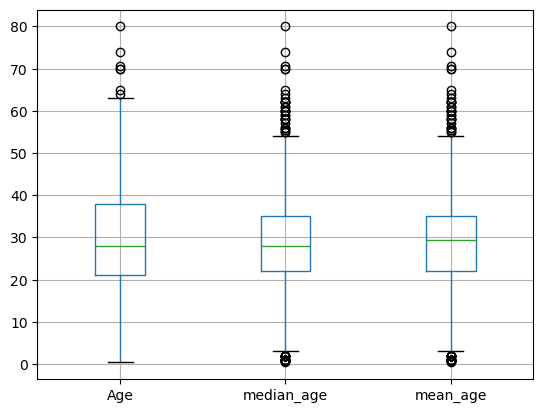

In [42]:
x_train[['Age' , 'median_age' , 'mean_age']].boxplot()

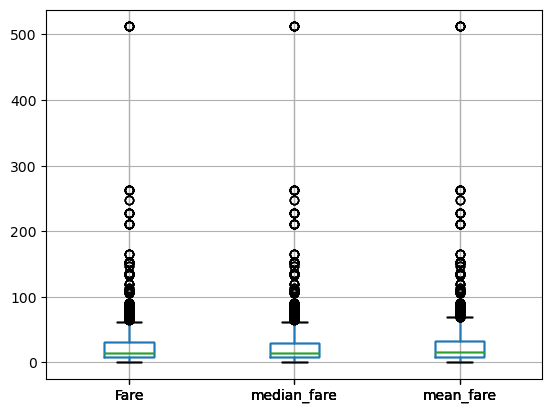

In [52]:

import matplotlib.pyplot as plt
x_train[['Fare', 'median_fare', 'mean_fare']].boxplot()
plt.show()


we usually check the varinace or covariance so that there is not much difference after using it
check boxplot and other kde graphs to see the distribution
this method applies good on fare but not good for age it is creating more outliers 

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(df.iloc[:,0:3] , df.iloc[:,-1], test_size=0.2 , random_state = 42)

In [60]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [62]:
trf = ColumnTransformer(
    [("imputer1" , SimpleImputer(strategy='median') ,['Age']),
      ("imputer2" , SimpleImputer(strategy='mean') , ['Fare'])],
    remainder = 'passthrough')

In [64]:
trf1 = trf.fit_transform(X_train)

In [66]:
trf1

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

In [72]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [74]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])